## Reviews Part I: Sentiment Analysis 

In [267]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [268]:
cols = ["comments"]
reviews= pd.read_csv("reviews.csv", usecols = cols)
reviews["comments"] = reviews["comments"].astype(str) #spliting the text into words
reviews.drop(reviews.index[10001:1043004], inplace=True)
reviews.head()

,comments
0,My girlfriend and I hadn't known Alina before ...
1,Alina was a really good host. The flat is clea...
2,Alina is an amazing host. She made me feel rig...
3,"Alina's place is so nice, the room is big and ..."
4,"Nice location in Islington area, good for shor..."


### Preprocessing/Cleaning of the Data 

In [269]:
#clean the text
#create a function to clean the comments

def CleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\S]+', '', text)
    
    return text

#cheaning the text
reviews['comments'] = reviews['comments'].apply(CleanTxt)

#shows clean text
reviews.head()

,comments
0,My girlfriend and I hadnt known Alina before w...
1,Alina was a really good host The flat is clean...
2,Alina is an amazing host She made me feel righ...
3,Alinas place is so nice the room is big and cl...
4,Nice location in Islington area good for short...


In [270]:
new_reviews = reviews.copy()

### Calculating the Subjectivty and Polarity using TextBlob

In [271]:
#CREATE A FUNCTION TO GET THE SUBJECTIVITY 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create new columns
new_reviews['Subjectivity']= new_reviews['comments'].apply(getSubjectivity)
new_reviews['Polarity']= new_reviews['comments'].apply(getPolarity)

#shows new 
new_reviews.head(10)

,comments,Subjectivity,Polarity
0,My girlfriend and I hadnt known Alina before w...,0.486742,0.264773
1,Alina was a really good host The flat is clean...,0.445833,0.306944
2,Alina is an amazing host She made me feel righ...,0.566266,0.280812
3,Alinas place is so nice the room is big and cl...,0.579915,0.397669
4,Nice location in Islington area good for short...,0.610000,0.457500
5,Im very happy to have been Alinas guest Weve h...,0.588010,0.337183
6,I stayed with Alina in her flat in London for ...,0.693981,0.545833
7,Alina was a perfect guest and her flat is abso...,0.666250,0.533750
8,Alinas flat is exceptional one brI have to sa...,0.626000,0.319111
9,The House is a piece of Art there are beautif...,0.730000,0.499167


### Computing the Negative, Neutral and Positve Analysis

In [272]:
from tqdm.notebook import tqdm

In [273]:
#compute a function to compute the negative, neutral and postive analysis
with tqdm(total=new_reviews.shape[0]) as pbar:
    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
        pbar.update(1)


new_reviews['Analysis']= new_reviews['Polarity'].apply(getAnalysis)


#show dataframe
new_reviews

  0%|          | 0/10001 [00:00<?, ?it/s]

,comments,Subjectivity,Polarity,Analysis
0,My girlfriend and I hadnt known Alina before w...,0.486742,0.264773,Positive
1,Alina was a really good host The flat is clean...,0.445833,0.306944,Positive
2,Alina is an amazing host She made me feel righ...,0.566266,0.280812,Positive
3,Alinas place is so nice the room is big and cl...,0.579915,0.397669,Positive
4,Nice location in Islington area good for short...,0.610000,0.457500,Positive
...,...,...,...,...
9996,I had an experience with Anthonys flat Everyth...,0.551389,0.404167,Positive
9997,We had a great weekend staying in Anthonys apa...,0.495299,0.349573,Positive
9998,Everything was as Anthony had described and th...,0.559000,0.322333,Positive
9999,Anthony was a fantastic host from the moment ...,0.513333,0.305556,Positive


In [274]:
new_reviews['Analysis'].value_counts()

Positive    9119
Neutral      787
Negative      95
Name: Analysis, dtype: int64

In [275]:
new_reviews.loc[[3138, 4000], :]

,comments,Subjectivity,Polarity,Analysis
3138,This place isnt as described the actual apartm...,0.543750,-0.13125,Negative
4000,Maria was in constant communication with me an...,0.333333,0.00000,Neutral


Shows that most of the 10000 selected comments are postive, compared to negative and neutal comments

### Plotting the subjectivity and polarity scatterplot

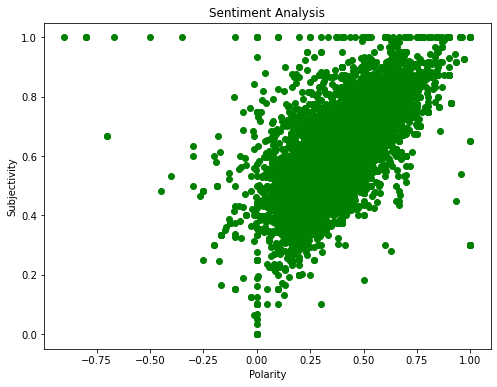

In [276]:
plt.figure(figsize =(8,6))
for i in range (0, new_reviews.shape[0]):
    plt.scatter(new_reviews['Polarity'][i], new_reviews['Subjectivity'][i], color = 'Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [277]:
cols = [
    "amenities",
    "price",
    "review_scores_rating",
    "reviews_per_month"
]

listing = pd.read_csv("listings.csv", usecols=cols)

In [278]:
airbnb_reviews = pd.read_csv("reviews.csv")

In [279]:
new_airbnb_reviews = pd.concat([airbnb_reviews, listing], axis='columns') 

In [280]:
new_airbnb_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,amenities,price,review_scores_rating,reviews_per_month
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Buil...",$65.00,4.86,0.16
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w...",$75.00,4.79,0.61
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron...",$265.00,4.69,0.33
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...","[""Shampoo"", ""Carbon monoxide alarm"", ""Hot wate...",$150.00,NaN,NaN
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...","[""Shampoo"", ""Washer"", ""Heating"", ""Coffee maker...",$29.00,4.78,0.91


In [281]:
new_airbnb_reviews.shape

(1043004, 10)

In [282]:
new_airbnb_reviews.dtypes

listing_id                int64
id                        int64
date                     object
reviewer_id               int64
reviewer_name            object
comments                 object
amenities                object
price                    object
review_scores_rating    float64
reviews_per_month       float64
dtype: object

## Reviews Part II: Comparing Prices to Reviews

### Changing price into floats and removing $

In [283]:
# Remove $ from price before conversion to float
new_airbnb_reviews['price'] = new_airbnb_reviews['price'].str.replace("$", " ")
# Print header to make sure change was done
new_airbnb_reviews['price'].head()

/var/folders/0k/qsrs17bs5n1gr22p3vddn0xm0000gn/T/ipykernel_1374/2979416809.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_airbnb_reviews['price'] = new_airbnb_reviews['price'].str.replace("$", " ")


0      65.00
1      75.00
2     265.00
3     150.00
4      29.00
Name: price, dtype: object

In [284]:
new_airbnb_reviews.price = new_airbnb_reviews.price.replace('[\$,]', '', regex=True).astype(float)

### Plotting the Review score rating and Price using Matplotlib

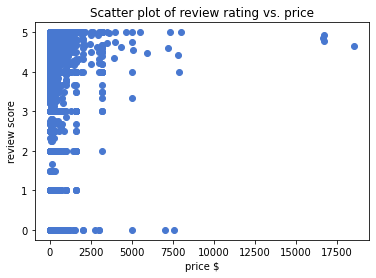

In [285]:
import matplotlib.pyplot as plt

plt.scatter(new_airbnb_reviews['price'],new_airbnb_reviews['review_scores_rating'])
plt.xlabel('price $')
plt.ylabel('review score')
plt.title('Scatter plot of review rating vs. price')
plt.show()

## Reviews III: Price vs Reviews_per_month Scatter Graph

In [286]:
import seaborn as sns # ploting the data

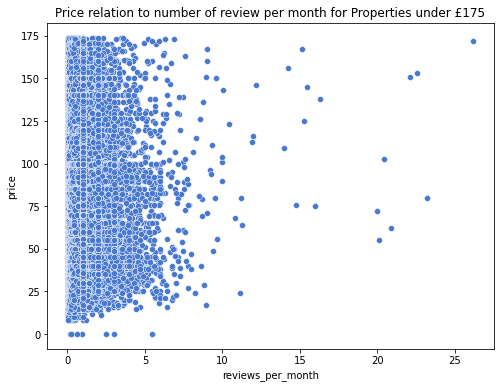

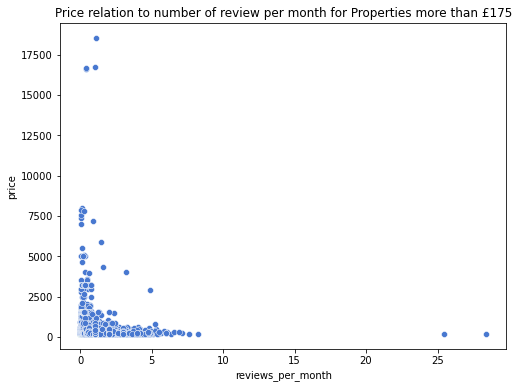

In [287]:
sns.set_palette("muted")
x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number of review per month for Properties under £175'
data_filtered = new_airbnb_reviews.loc[(new_airbnb_reviews['price'] < 175) & (new_airbnb_reviews['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month for Properties more than £175'
data_filtered = new_airbnb_reviews.loc[new_airbnb_reviews['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

## Amenities: The Top 20 Amenities 

### Preprocessing the Amenities column & Plotting of the amenities using Matplotlib

In [288]:
new_airbnb_reviews = new_airbnb_reviews[new_airbnb_reviews['amenities'].notnull()] #AttributeError: 'float' object has no attribute 'split'

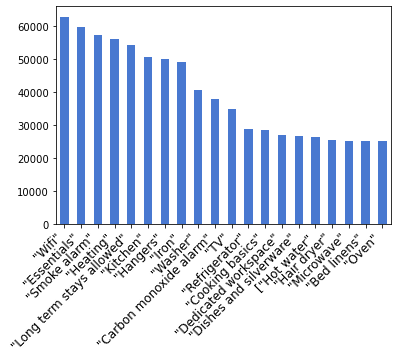

In [289]:
# Create an array of all unique amenities across all rows by splitting it
# measure the top 20 amenities
pd.Series(np.concatenate(new_airbnb_reviews['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()